In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic_dataset.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


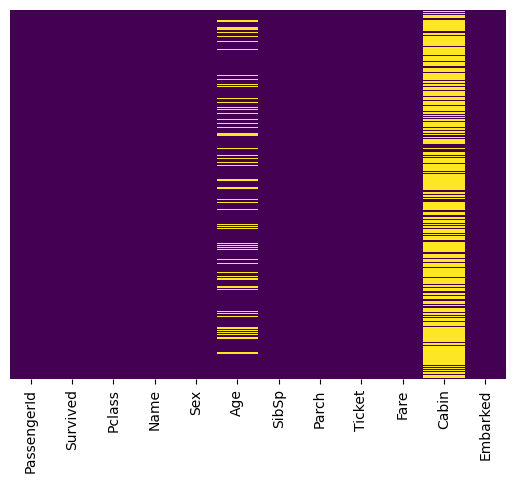

In [6]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [7]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
titanic1 = titanic.copy()

In [9]:
titanic1['Cabin'].fillna("0", inplace=True)

/tmp/ipykernel_1413/1378779064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic1['Cabin'].fillna("0", inplace=True)


In [10]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [11]:
# Remover a coluna "age"
titanic1.drop(columns=['Age'], inplace=True)
titanic1.drop(columns=['Name'], inplace=True)
titanic1.drop(columns=['Ticket'], inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

titanic1['gender_encoded'] = label_encoder.fit_transform(titanic1['Sex'])  
titanic1.drop(columns=['Sex'], inplace=True)

titanic1['Cabin_encoded'] = label_encoder.fit_transform(titanic1['Cabin'])  
titanic1.drop(columns=['Cabin'], inplace=True)

# Remover as linhas onde "embarked" está vazio ou com NaN
titanic1.dropna(subset=['Embarked'], inplace=True)

titanic1['Embared_encoded'] = label_encoder.fit_transform(titanic1['Embarked'])  
titanic1.drop(columns=['Embarked'], inplace=True)

titanic1.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,gender_encoded,Cabin_encoded,Embared_encoded
0,1,0,3,1,0,7.2500,1,0,2
1,2,1,1,1,0,71.2833,0,82,0
2,3,1,3,0,0,7.9250,0,0,2
3,4,1,1,1,0,53.1000,0,56,2
4,5,0,3,0,0,8.0500,1,0,2


In [12]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      889 non-null    int64  
 1   Survived         889 non-null    int64  
 2   Pclass           889 non-null    int64  
 3   SibSp            889 non-null    int64  
 4   Parch            889 non-null    int64  
 5   Fare             889 non-null    float64
 6   gender_encoded   889 non-null    int64  
 7   Cabin_encoded    889 non-null    int64  
 8   Embared_encoded  889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


In [13]:
titanic1["Parch"].nunique()

7

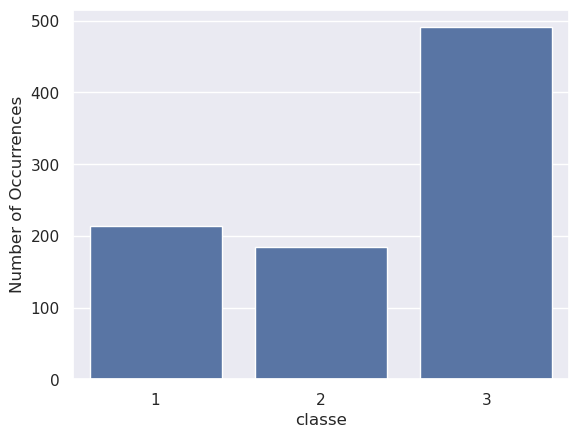

In [14]:
incidents_count = titanic1['Pclass'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('classe', fontsize=12)
plt.show()

In [15]:
X = titanic1.drop(columns=['Survived']) 
y = titanic1['Survived']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (711, 8) (711,)
Testing data shape: (178, 8) (178,)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Check the accuracy on the training set (optional)
training_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

# Evaluate the model on the test set
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.7415730337078652


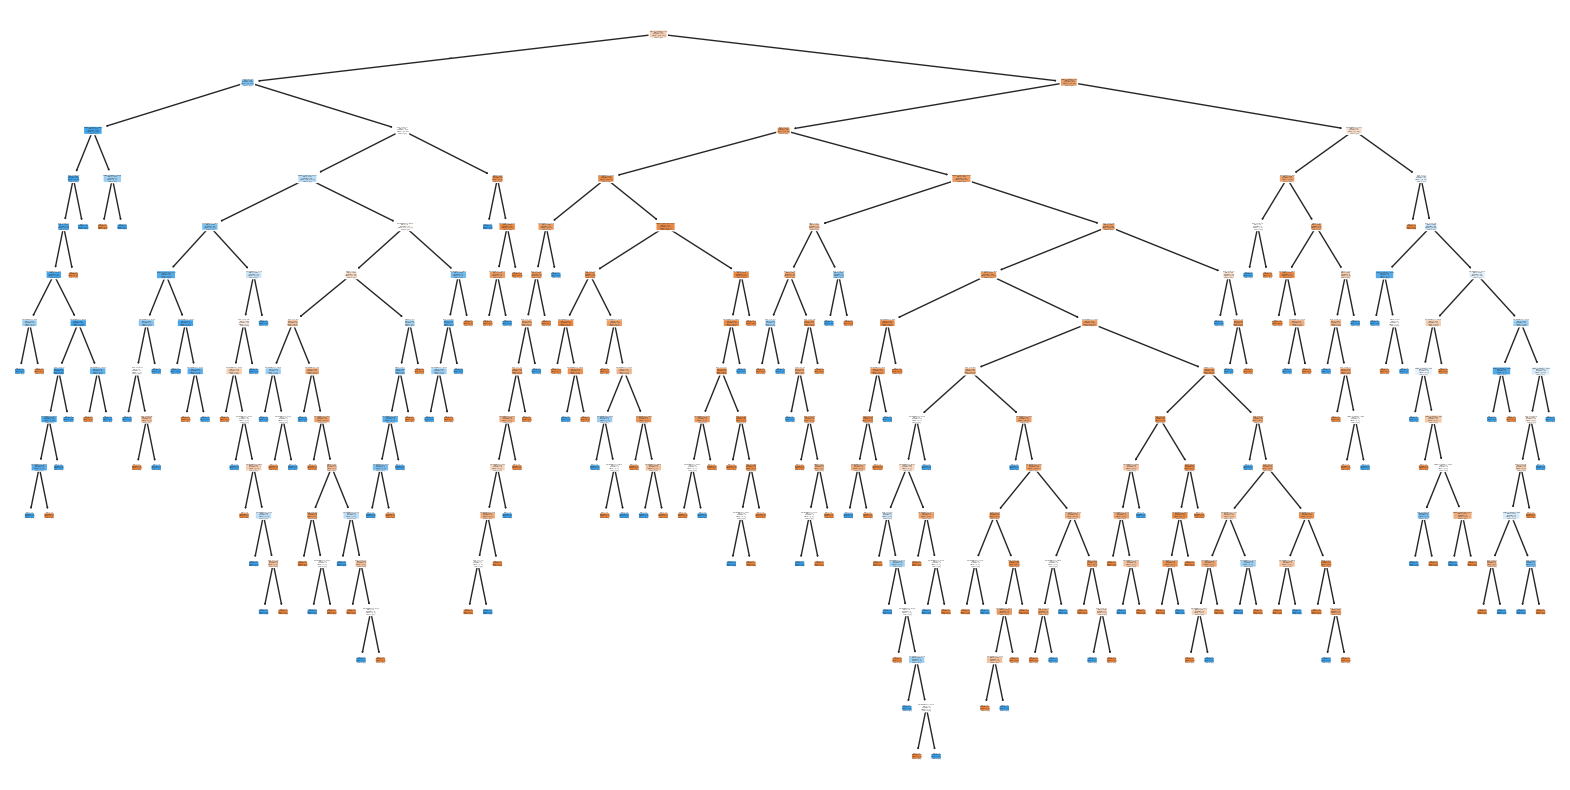

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size for better readability
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

In [19]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       109
           1       0.67      0.65      0.66        69

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178



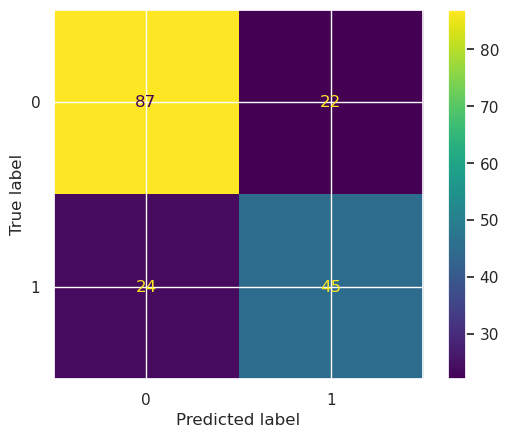

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
dt_predictions = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
print(clf.get_depth())
print(clf.get_n_leaves())

15
170


In [22]:
param_grid_dt = {'criterion': ["gini","entropy"], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit=True,verbose=2)

In [23]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [24]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.79      0.65      0.71        69

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



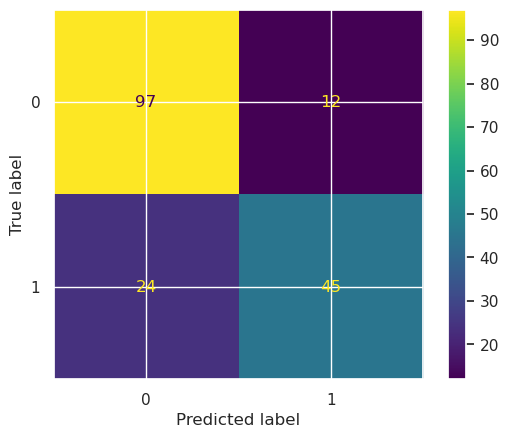

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt.predict(X_test))
plt.show()

In [26]:
max_depth = clf.get_depth()
max_depth

15

In [27]:
param_grid_pru = {'max_depth': [max_depth for max_depth in range(1, max_depth + 1)]}
estimator_pru = DecisionTreeClassifier(random_state=2022)
max_depth_gs = GridSearchCV(estimator_pru, param_grid_pru)

In [28]:
max_depth_gs.fit(X_train, y_train)

/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]})

In [29]:
max_depth_gs.best_params_

{'max_depth': 6}

In [30]:
max_depth_tree = max_depth_gs.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=6, random_state=2022)


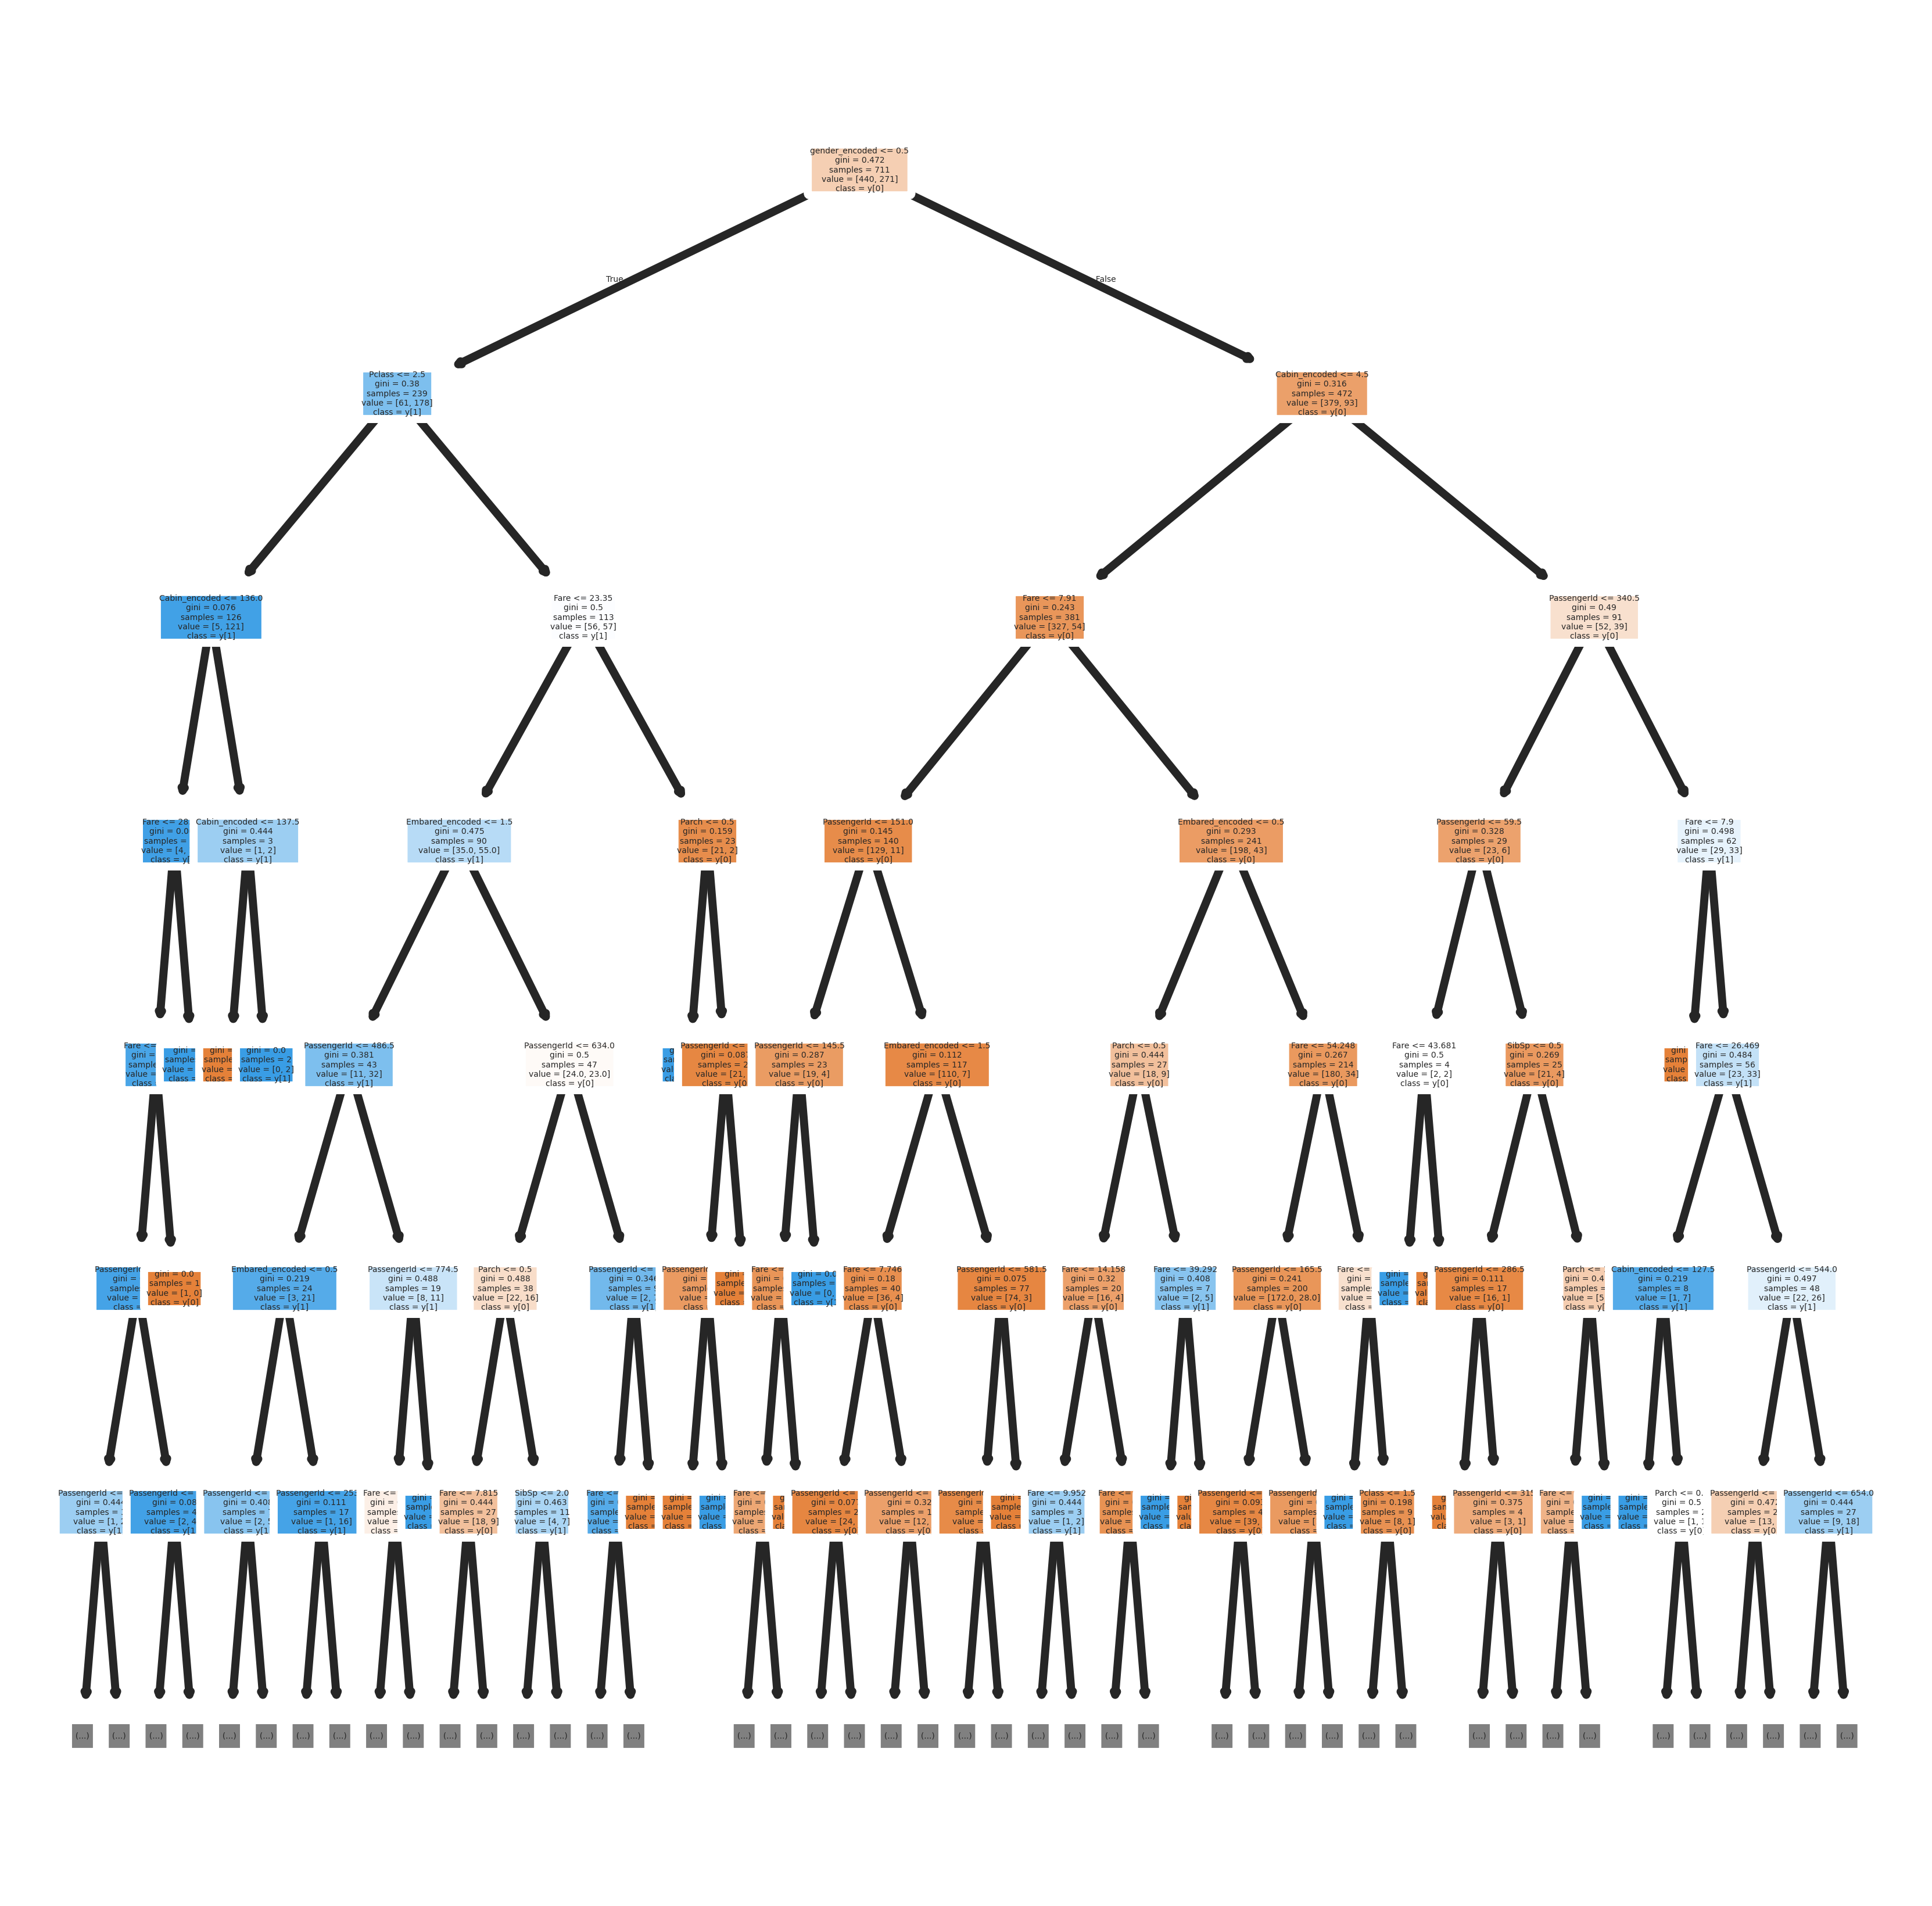

In [31]:
fig = plt.figure(figsize=(4,4), dpi=1000)
#clf.plot_tree(max_depth_tree)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True, max_depth=6)
plt.show()

In [33]:
print(classification_report(y_test, max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       109
           1       0.68      0.67      0.67        69

    accuracy                           0.75       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.75      0.75      0.75       178



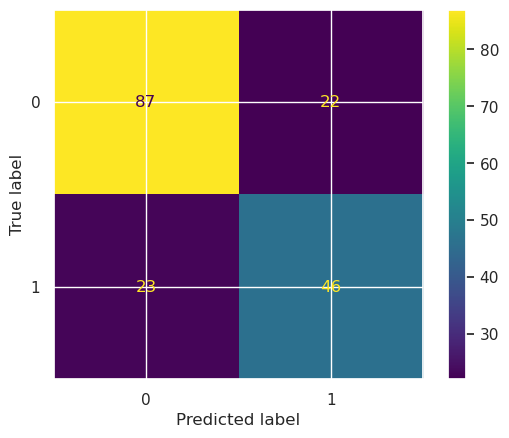

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, max_depth_tree.predict(X_test))
plt.show()

In [37]:
ccp_alphas = clf.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
ccp_alphas

array([0.        , 0.00082044, 0.00089076, 0.00089191, 0.00091532,
       0.0009212 , 0.00093765, 0.00093765, 0.00093765, 0.00093765,
       0.0010716 , 0.00112518, 0.00112518, 0.00112858, 0.00113187,
       0.00117206, 0.00122107, 0.00123066, 0.00123066, 0.00123066,
       0.00123066, 0.00123066, 0.00125134, 0.00127861, 0.00129911,
       0.00129992, 0.00132374, 0.00132374, 0.00134254, 0.00135199,
       0.00135529, 0.00139104, 0.00146507, 0.00150023, 0.00150023,
       0.00152279, 0.00152974, 0.00158228, 0.00164088, 0.00168776,
       0.00171455, 0.00172966, 0.00175989, 0.00179005, 0.00184644,
       0.00187529, 0.00187529, 0.00191436, 0.00191436, 0.00196712,
       0.00208366, 0.0021621 , 0.00218784, 0.00219346, 0.00227039,
       0.00240482, 0.00245159, 0.00250039, 0.00252671, 0.00260469,
       0.00261454, 0.00290655, 0.00377021, 0.00410172, 0.00529371,
       0.00588357, 0.014157  , 0.0170005 , 0.03482866, 0.13389773])

In [38]:
estimator_pru.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [39]:
param_grid_pru2 = {'ccp_alpha': [alpha for alpha in ccp_alphas]}
estimator_pru2 = DecisionTreeClassifier(random_state=2022)
ccp_alpha_gs = GridSearchCV(estimator_pru2, param_grid_pru2)

In [40]:
ccp_alpha_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'ccp_alpha': [0.0, 0.0008204406938584155,
                                       0.0008907641819034222,
                                       0.0008919076532537476,
                                       0.0009153215904270752,
                                       0.0009211965685427823,
                                       0.0009376465072667604,
                                       0.0009376465072667604,
                                       0.0009376465072667604,
                                       0.0009376465072667605,
                                       0.0010715960083048691,
                                       0.0011251758087201123,
                                       0.001125175808...
                                       0.0011318732837720183,
                                       0.0011720581340834506,
                                       0.0012210714742360317,
                                       0.0012306610407876231,
                                       0.0012306610407876231,
                                       0.0012306610407876231,
                                       0.0012306610407876231,
                                       0.0012306610407876231,
                                       0.0012513444196243894,
                                       0.0012786088735455825,
                                       0.0012991131755093045,
                                       0.0012999190214380086,
                                       0.0013237362455530738,
                                       0.0013237362455530738,
                                       0.0013425393172228621,
                                       0.001351986714208169, ...]})

In [41]:
ccp_alpha_gs.best_params_

{'ccp_alpha': 0.005293705885784289}

In [42]:
best_ccp_alpha_tree = ccp_alpha_gs.best_estimator_
print(best_ccp_alpha_tree)

DecisionTreeClassifier(ccp_alpha=0.005293705885784289, random_state=2022)


<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

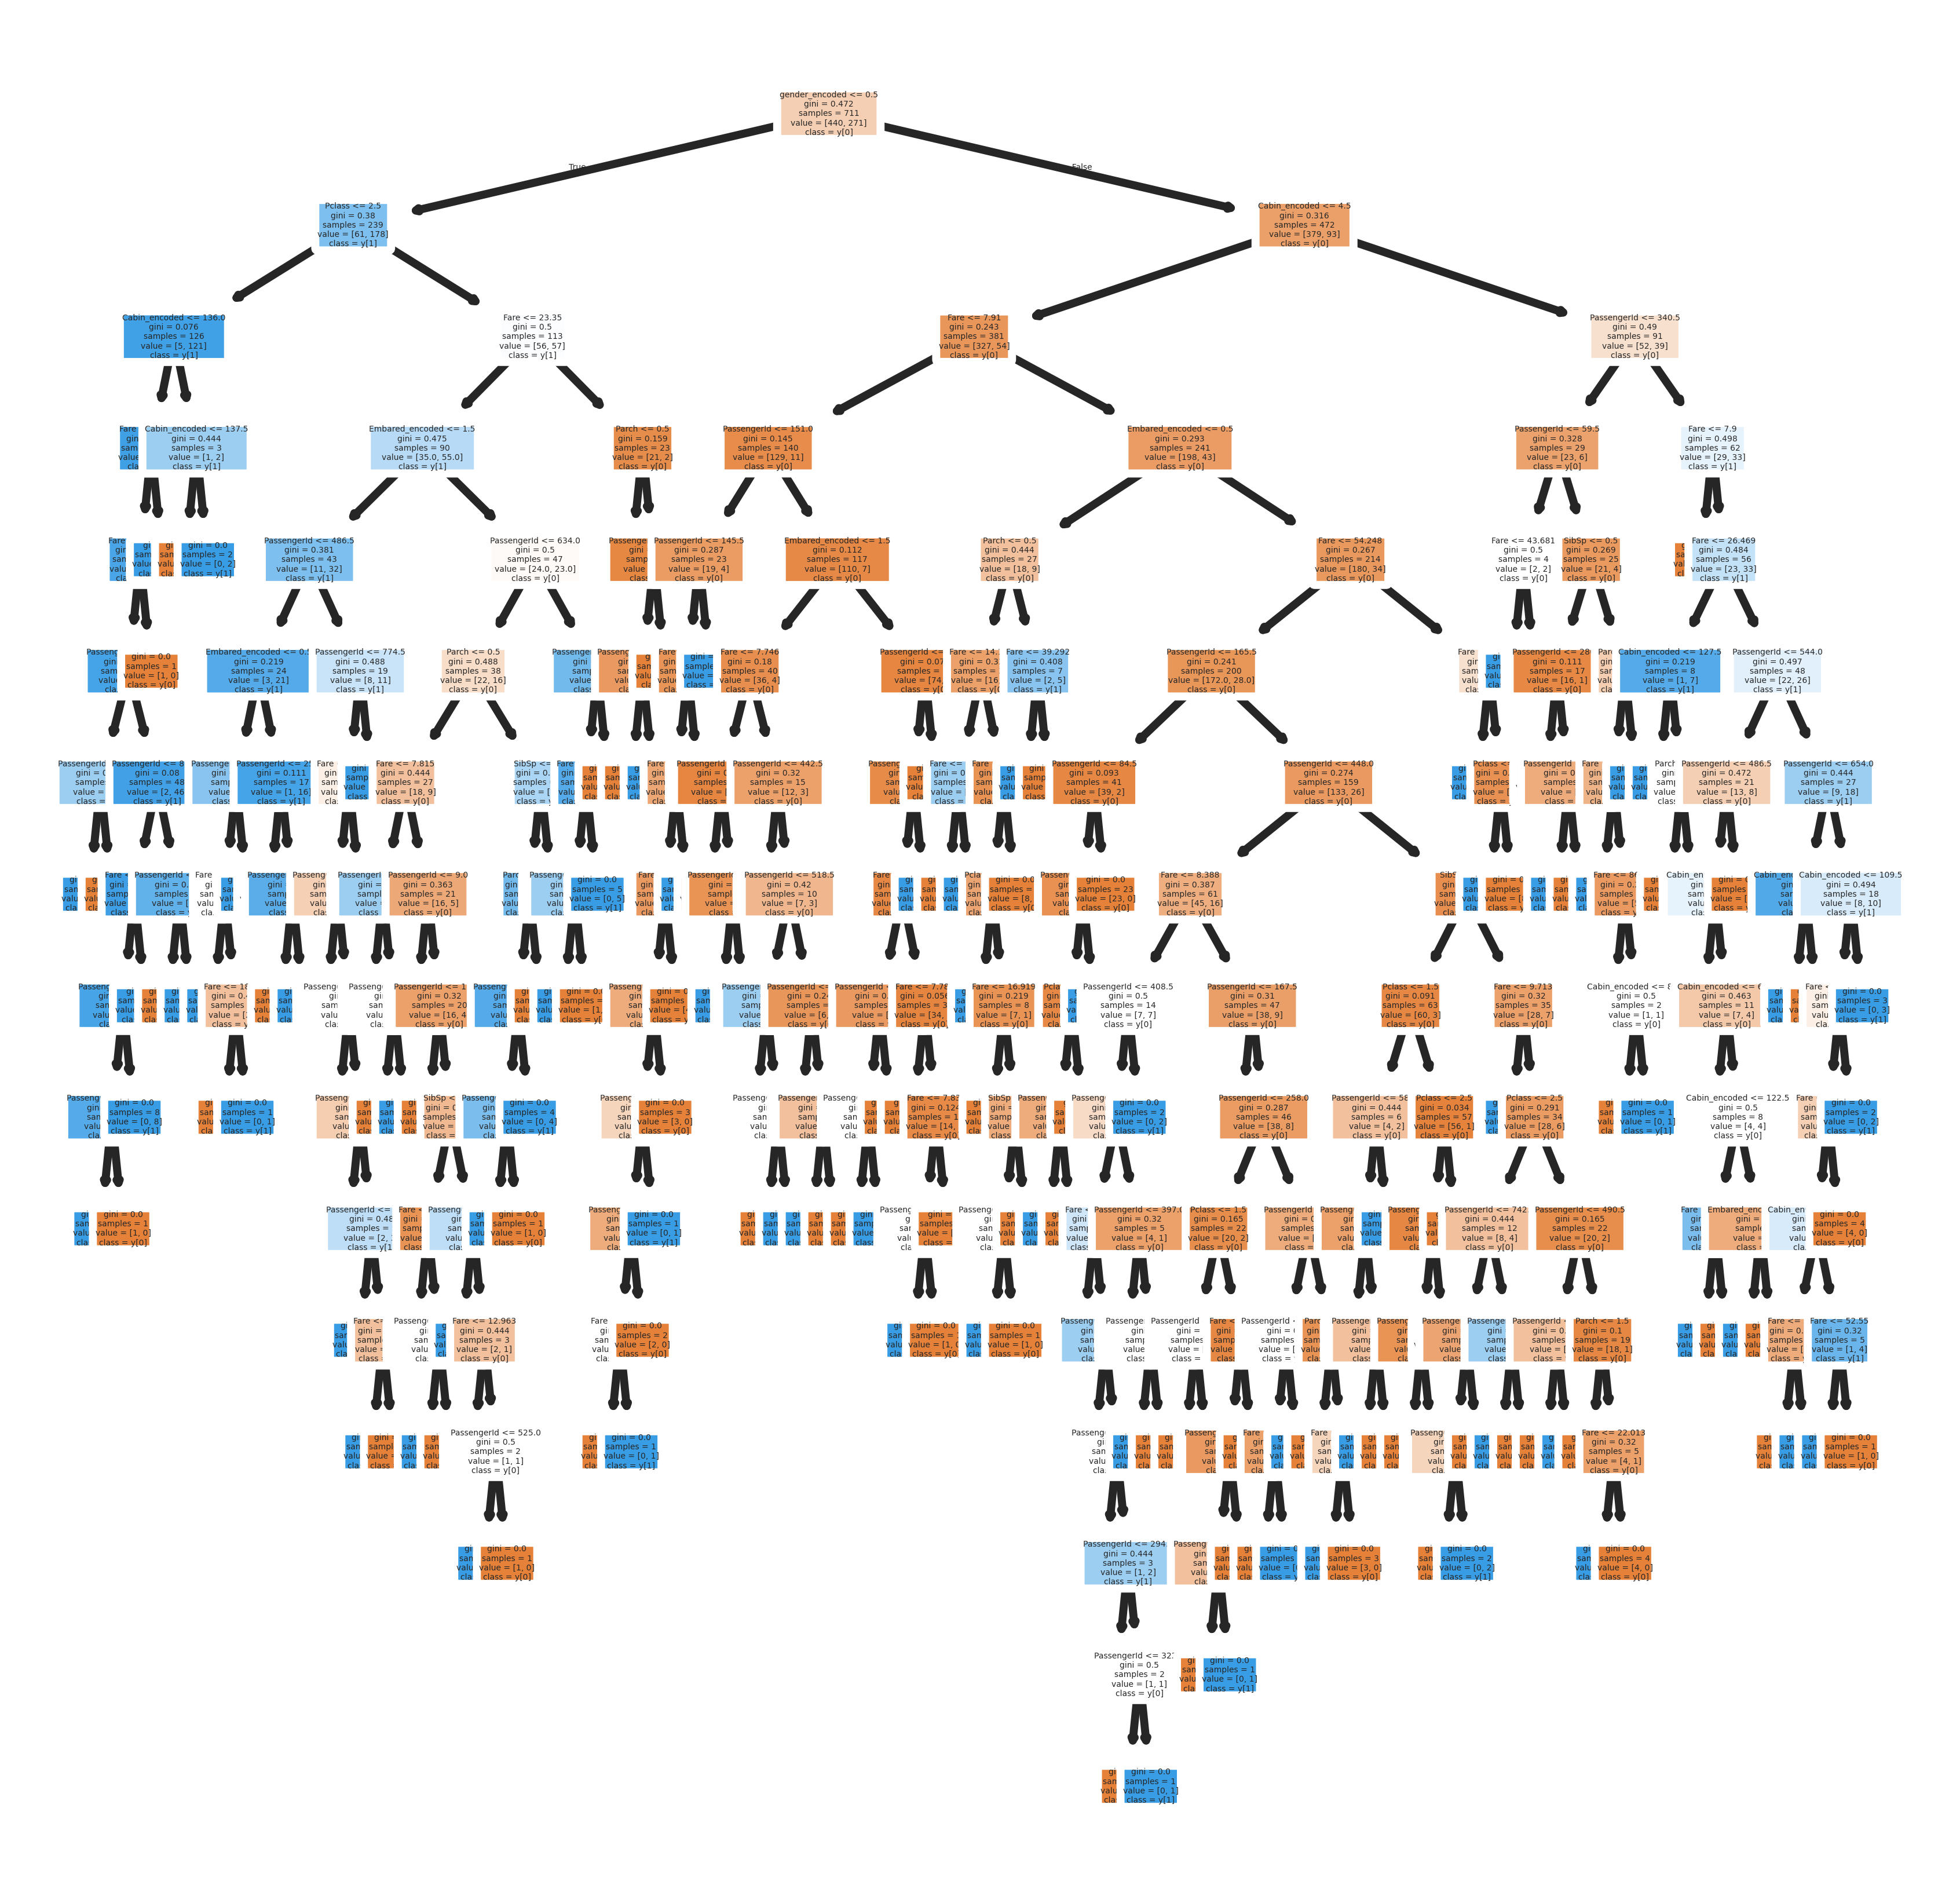

In [45]:
fig = plt.figure(figsize=(4,4), dpi=1000)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

In [46]:
print(classification_report(y_test, best_ccp_alpha_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



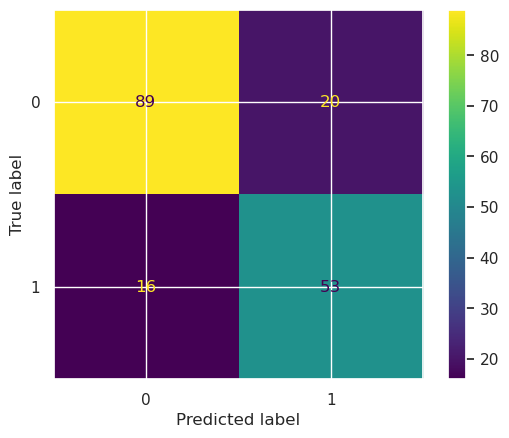

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, best_ccp_alpha_tree.predict(X_test))
plt.show()